In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-level-1/Dataset  (2).csv


## 1.Importing Necessary Libraries and Loading the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/restaurant-level-1/Dataset  (2).csv")


## Level1 Task1: Top Cuisines 
## 1.1: Determine the top three most common cuisines in the dataset. 

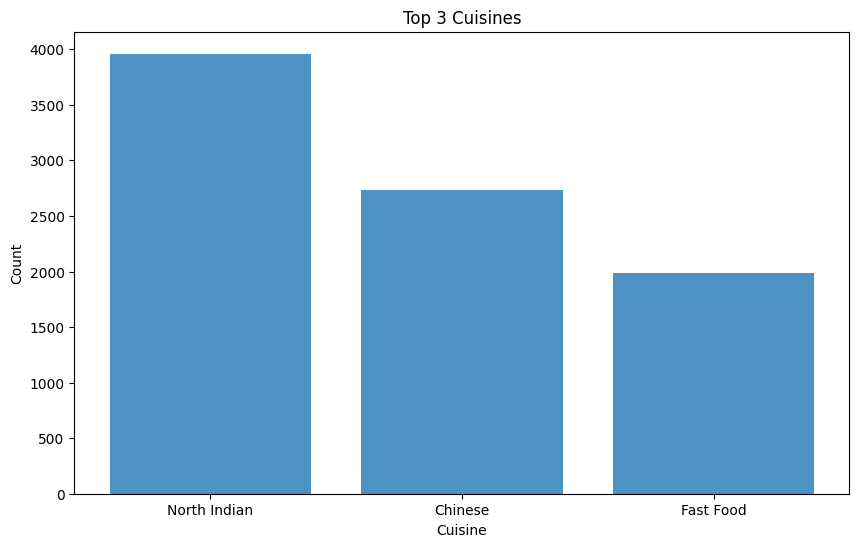

In [3]:
import matplotlib.pyplot as plt

# Calculate the top 3 cuisines
top_cuisines = data['Cuisines'].str.split(', ', expand=True).stack().value_counts().head(3)

# Plot the top 3 cuisines as a bar plot
plt.figure(figsize=(10,6))
plt.bar(top_cuisines.index, top_cuisines.values, alpha=0.8)
plt.title('Top 3 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

## 1.2 Calculate the percentage of restaurants that serve each of the top cuisines.

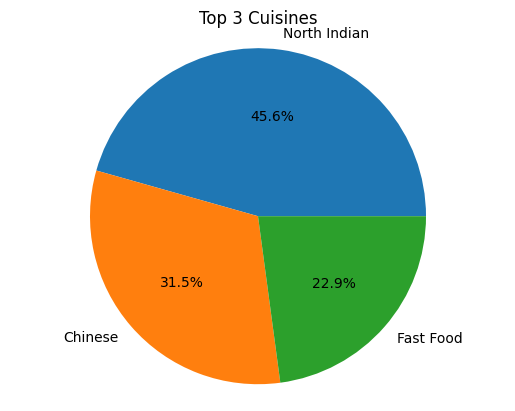

In [4]:
import matplotlib.pyplot as plt

# Calculate the top 3 cuisines
top_cuisines = data['Cuisines'].str.split(', ', expand=True).stack().value_counts().head(3)

# Calculate the percentage of each cuisine
percentage = (top_cuisines / len(data)) * 100

# Create a pie chart
plt.pie(top_cuisines.values, labels=top_cuisines.index, autopct=lambda p: f"{p:.1f}%")
plt.axis('equal')
plt.title('Top 3 Cuisines')
plt.show()

## Task2: City Analysis
## 2.1: Identify the city with the highest number of restaurants in the dataset.

In [5]:
from termcolor import colored

city_restaurant_counts = data.groupby('City')['Restaurant ID'].nunique()
city_with_most_restaurants = city_restaurant_counts.idxmax()

print(colored(f"City with the most restaurants: {city_with_most_restaurants}", 'green', 'on_yellow'))





City with the most restaurants: New Delhi


## 2.2 Calculate the average rating for restaurants in each city.  

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/kaggle/input/restaurant-level-1/Dataset  (2).csv")

# Calculate the average rating for restaurants in each city
avg_rating_by_city = data.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort cities by average rating (optional)
avg_rating_by_city = avg_rating_by_city.sort_values(by='Aggregate rating', ascending=False)

# Display the average ratings for each city
print("Average Ratings for Restaurants in Each City:")
print(avg_rating_by_city)


Average Ratings for Restaurants in Each City:
                 City  Aggregate rating
56         Inner City          4.900000
107       Quezon City          4.800000
73        Makati City          4.650000
95         Pasig City          4.633333
75   Mandaluyong City          4.625000
..                ...               ...
88          New Delhi          2.438845
83          Montville          2.400000
78          Mc Millan          2.400000
89              Noida          2.036204
43          Faridabad          1.866932

[141 rows x 2 columns]


## 2.3: Determine the city with the highest average rating.

In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/kaggle/input/restaurant-level-1/Dataset  (2).csv")

# Calculate the number of restaurants in each city
if 'City' in data.columns:
    city_restaurant_counts = data.groupby('City')['Restaurant ID'].nunique()
    city_with_most_restaurants = city_restaurant_counts.idxmax()
    print(f"City with the most restaurants: {'|'.join(city_with_most_restaurants.split(' '))}|")
else:
    print("City column not found in the DataFrame.")


City with the most restaurants: New|Delhi|


## Task3 : Price Range Distribution
## 3.1 : Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.


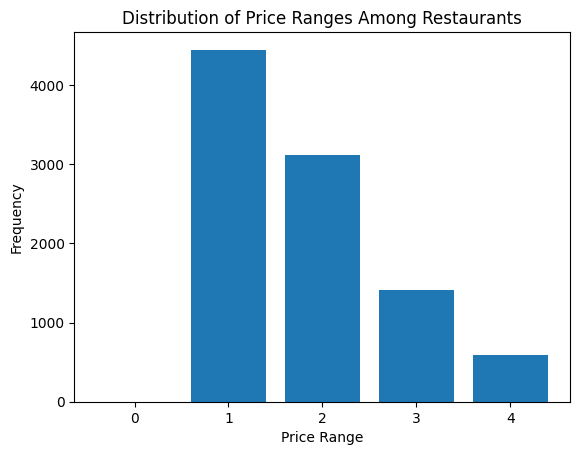

In [8]:
import matplotlib.pyplot as plt

# Extract the price range column as a list
price_ranges = data['Price range'].tolist()

# Create a histogram
plt.hist(price_ranges, bins=range(0, 6), align='left', rwidth=0.8)

# Set the x-axis label
plt.xlabel('Price Range')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Distribution of Price Ranges Among Restaurants')

# Show the plot
plt.show()

## 3.2: Calculate the percentage of restaurants in each price range category.

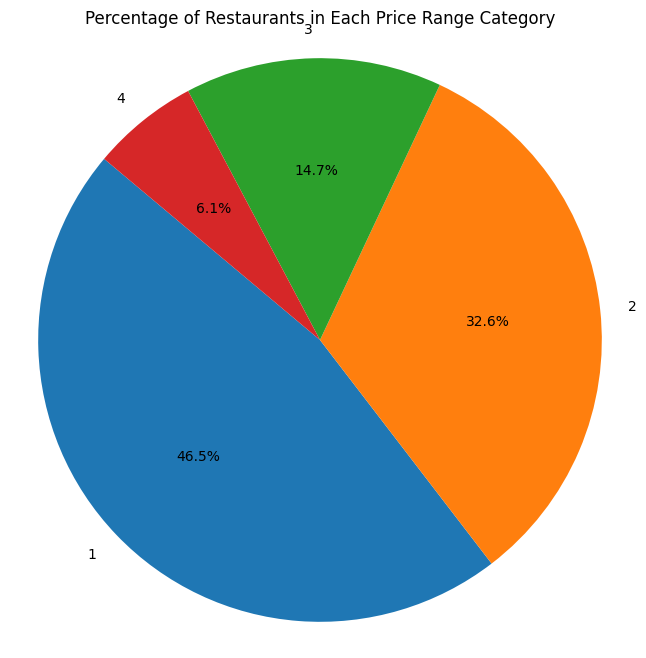

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
dataset_path = "/kaggle/input/restaurant-level-1/Dataset  (2).csv"
data = pd.read_csv(dataset_path)

# Adjust the column name based on the actual column name in your dataset
price_range_column = "Price range"  # Update this with the correct column name

# Check if the specified price range column exists in the dataset
if price_range_column in data.columns:
    # Calculate the percentage of restaurants in each price range category
    price_range_counts = data[price_range_column].value_counts(normalize=True) * 100

    # Sort price range categories by index (if needed)
    price_range_counts = price_range_counts.sort_index()

    # Create a pie chart using matplotlib
    plt.figure(figsize=(8, 8))
    plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', startangle=140)

    # Add title
    plt.title('Percentage of Restaurants in Each Price Range Category')

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')

    # Show plot
    plt.show()

else:
    print(f"Error: '{price_range_column}' column not found in the dataset.")


## Task 4 :  Online Delivery
## Determine the percentage of restaurants that offer online delivery. Compare the average ratings of restaurants with and without online delivery.

Percentage of Restaurants Offering Online Delivery: 100.00%

Average Ratings by Online Delivery Status:
Rating text           Average  Excellent      Good  Not rated      Poor  \
Has Online delivery                                                       
True                 0.391268   0.031515  0.219872   0.224898  0.019474   

Rating text          Very Good  
Has Online delivery             
True                  0.112972  


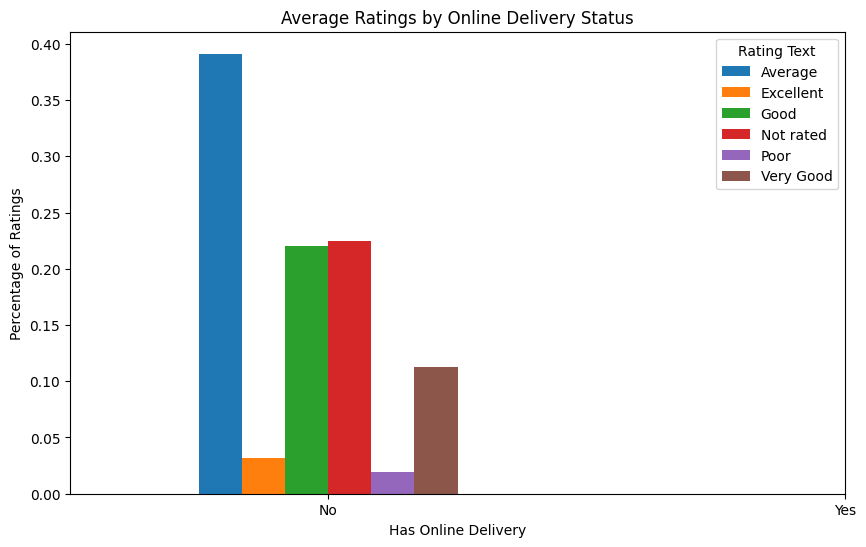

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


import plotly.express as px
from IPython.display import IFrame


# Load the dataset into a DataFrame
dataset_path = "/kaggle/input/restaurant-level-1/Dataset  (2).csv"
data = pd.read_csv(dataset_path)

# Adjust the column names based on the actual column names in your dataset
delivery_column = "Has Online delivery"  # Update with the correct column name for online delivery
rating_text_column = "Rating text"  # Update with the correct column name for rating text

# Check if the specified columns exist in the dataset
if delivery_column in data.columns and rating_text_column in data.columns:
    # Convert "Has Online delivery" column to boolean (True/False)
    data[delivery_column] = data[delivery_column].astype(bool)

    # Calculate the percentage of restaurants that offer online delivery
    online_delivery_percentage = (data[delivery_column].sum() / len(data)) * 100

    # Group the data by online delivery status and calculate average ratings
    avg_ratings_by_delivery = data.groupby(delivery_column)[rating_text_column].value_counts(normalize=True).unstack()

    # Display the results
    print(f"Percentage of Restaurants Offering Online Delivery: {online_delivery_percentage:.2f}%\n")
    print("Average Ratings by Online Delivery Status:")
    print(avg_ratings_by_delivery)

    # Plotting average ratings comparison
    avg_ratings_by_delivery.plot(kind='bar', figsize=(10, 6))
    plt.title('Average Ratings by Online Delivery Status')
    plt.xlabel('Has Online Delivery')
    plt.ylabel('Percentage of Ratings')
    plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
    plt.legend(title='Rating Text')
    plt.show()
else:
    print(f"Error: One or more specified columns not found in the dataset.")
